# Roulette Simulation and Profit Analysis

This project explores the statistical outcomes of playing American roulette, focusing on a simple bet: wagering $1 on black. American roulette features a wheel with 38 slots—18 black, 18 red, and 2 green (0 and 00)—giving the casino a house edge of approximately 5.26% due to the unfavorable odds of winning (18/38) versus losing (20/38). The project consists of six tasks designed to analyze this game through simulation and theory:

1. **Simulation Function:** Develop a function to simulate N rounds of betting on black, tracking total earnings \( S_N \).
2. **Total Earnings Distribution:** Use Monte Carlo simulation to study S_N for N = 10, 25, 100, 1000 , plotting distributions and examining normality, expected values, and standard errors.
3. **Average Winnings Distribution:** Repeat the analysis for average winnings \( S_N / N \), observing how variability decreases with \( N \).
4. **Theoretical vs. Simulated Comparison:** Calculate theoretical E[S_N] and standard errors, comparing them to simulation results to validate accuracy.
5. **Casino Loss Probability (CLT):** Approximate the probability of positive earnings P(S_N > 0) for N = 25 using the Central Limit Theorem, verified by simulation.
6. **Probability Trend:** Plot the probability of casino loss from N = 25 to 1000, discussing why casinos benefit from prolonged play.

Through Python-based simulations and statistical analysis, this project illustrates how the **house edge** ensures casino profits over time, while randomness allows short-term player wins, diminishing as the number of rounds increases.

In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt

## 1)

In [38]:
RED_SLOTS = 18
BLACK_SLOTS = 18
GREEN_SLOTS = 2

def one_dollor_bet():
    total_slots = RED_SLOTS + BLACK_SLOTS + GREEN_SLOTS
    
    outcome = random.randint(1, total_slots)
    
    if outcome <= BLACK_SLOTS:
        return 1  
    else:
        return -1  

def simulate_game(N):
    Sn = 0
    for _ in range(N):
        Sn += one_dollor_bet()
    
    return Sn
    

# 2)

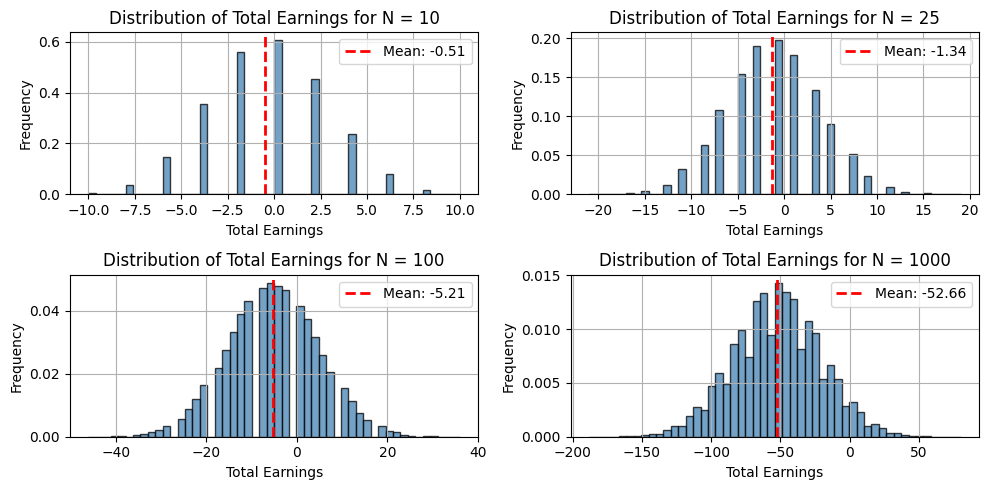

Expected value (mean) for N = 10: -0.51422
Standard error for N = 10: 0.009992486072844935

Expected value (mean) for N = 25: -1.33572
Standard error for N = 25: 0.015762617828774507

Expected value (mean) for N = 100: -5.2118
Standard error for N = 100: 0.031625410789426905

Expected value (mean) for N = 1000: -52.6631
Standard error for N = 1000: 0.10054738675818481



In [41]:
def monte_carlo_simulation_totall_winnings():
    N_values = [10, 25, 100, 1000]
    sim_num = 100000
    earnings = {N: [] for N in N_values}
    means = {N: 0 for N in N_values}
    std_devs = {N: 0 for N in N_values}
    
    for N in N_values:
        for _ in range(sim_num):
            earnings[N].append(simulate_game(N))

        means[N] = np.mean(earnings[N])
        std_devs[N] = np.std(earnings[N])
          
    plt.figure(figsize=(10, 5))
    subplot = 1
    
    for N in N_values:
        plt.subplot(2, 2, subplot)
        subplot += 1

        plt.hist(earnings[N], bins=50, alpha=0.75, color='steelblue', edgecolor='black', density=True)
        plt.axvline(means[N], color='red', linestyle='dashed', linewidth=2, label=f'Mean: {means[N]:.2f}')

        plt.title(f'Distribution of Total Earnings for N = {N}')
        plt.xlabel('Total Earnings')
        plt.ylabel('Frequency')
        plt.legend(loc='upper right')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    for N in N_values:
        print(f"Expected value (mean) for N = {N}: {means[N]}")
        print(f"Standard error for N = {N}: {std_devs[N] / np.sqrt(sim_num)}\n")

monte_carlo_simulation_totall_winnings()


# 3)

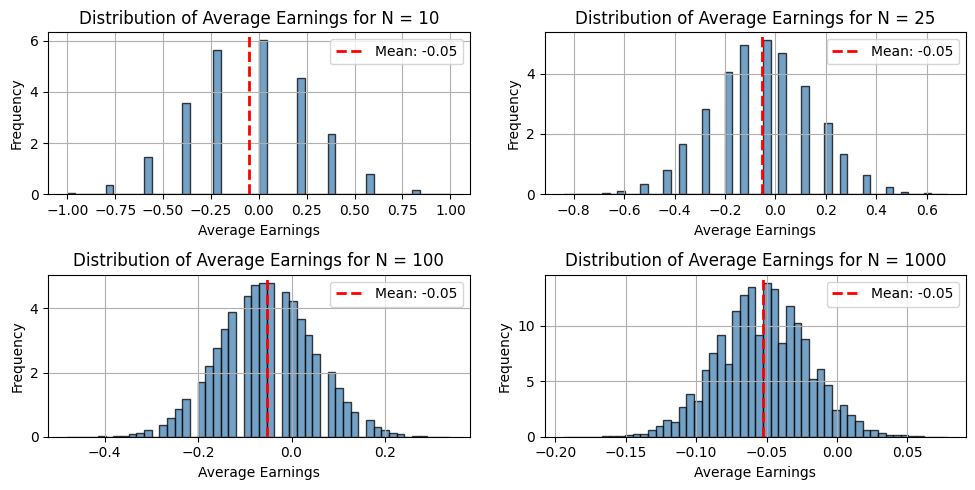

Expected value (mean) for N = 10: -0.051548000000000004
Standard error of mean for N = 10: 0.0010009855328425082

Expected value (mean) for N = 25: -0.05313840000000001
Standard error of mean for N = 25: 0.0006323795572711059

Expected value (mean) for N = 100: -0.053073200000000015
Standard error of mean for N = 100: 0.0003162947271416328

Expected value (mean) for N = 1000: -0.052573640000000005
Standard error of mean for N = 1000: 0.00010029447727319786



In [40]:
def monte_carlo_simulation_average_winnings():
    N_values = [10, 25, 100, 1000]
    sim_num = 100000
    earnings = {N: [] for N in N_values}
    means = {N: 0 for N in N_values}
    std_devs = {N: 0 for N in N_values}
    
    for N in N_values:
        for _ in range(sim_num):
            earnings[N].append(simulate_game(N) / N)

        means[N] = np.mean(earnings[N])
        std_devs[N] = np.std(earnings[N])
          
    plt.figure(figsize=(10, 5))
    subplot = 1
    
    for N in N_values:
        plt.subplot(2, 2, subplot)
        subplot += 1

        plt.hist(earnings[N], bins=50, alpha=0.75, color='steelblue', edgecolor='black', density=True)
        plt.axvline(means[N], color='red', linestyle='dashed', linewidth=2, label=f'Mean: {means[N]:.2f}')

        plt.title(f'Distribution of Average Earnings for N = {N}')
        plt.xlabel('Average Earnings')
        plt.ylabel('Frequency')
        plt.legend(loc='upper right')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    for N in N_values:
        print(f"Expected value (mean) for N = {N}: {means[N]}")
        print(f"Standard error of mean for N = {N}: {std_devs[N] / np.sqrt(sim_num)}\n")

monte_carlo_simulation_average_winnings()

# 4)

## Theoretical Calculations
First, we calculate the expected value and variance per round (X):
- **Outcomes:**
  - Win (black): +1, probability = $$ \frac{18}{38} = \frac{9}{19} $$
  - Lose (red/green): -1, probability = $$ \frac{20}{38} = \frac{10}{19} $$
- **Expected value per round:**
  $$
  E[X] = (1) \cdot \frac{9}{19} + (-1) \cdot \frac{10}{19} = \frac{9}{19} - \frac{10}{19} = -\frac{1}{19}
  $$
  $$
  -\frac{1}{19} \approx -0.0526
  $$
- **Variance per round:**
  $$
  E[X^2] = (1)^2 \cdot \frac{9}{19} + (-1)^2 \cdot \frac{10}{19} = \frac{9}{19} + \frac{10}{19} = \frac{19}{19} = 1
  $$
  $$
  Var(X) = E[X^2] - (E[X])^2 = 1 - \left(-\frac{1}{19}\right)^2 = 1 - \frac{1}{361} = \frac{360}{361}
  $$
  $$
  \frac{360}{361} \approx 0.9972
  $$
- **Standard deviation per round:**
  $$
  \sigma = \sqrt{\frac{360}{361}} \approx \sqrt{0.99722} \approx 0.9986
  $$

Now, for S_N over N rounds:
- **Expected value:** $$ E[S_N] = N \cdot E[X] = N \cdot -\frac{1}{19} $$
- **Standard deviation:** $$ \sigma_{S_N} = \sigma \cdot \sqrt{N} = 0.9986\cdot \sqrt{N} $$
- **Standard error:** $$ SE = \frac{\sigma_{S_N}}{\sqrt{100000}} $$, where $$ \sqrt{100000} = 316.2277 $$

For each \( N \):

- **\( N = 10 \)**:
  - $$ E[S_N] = 10 \cdot -\frac{1}{19} = -\frac{10}{19} \approx -0.5263 $$
  - $$ \sigma_{S_N} = 0.998 \cdot \sqrt{10} \approx 0.998614 \cdot 3.162 \approx 3.1573 $$
  - $$ SE = \frac{3.157}{316.227} \approx 0.0099 $$

- **\( N = 25 \)**:
  - $$ E[S_N] = 25 \cdot -\frac{1}{19} = -\frac{25}{19} \approx -1.3157 $$
  - $$ \sigma_{S_N} = 0.99861 \cdot \sqrt{25} = 0.99861 \cdot 5 \approx 4.99307 $$
  - $$ SE = \frac{4.99307}{316.22776} \approx 0.01578 $$

- **\( N = 100 \)**:
  - $$ E[S_N] = 100 \cdot -\frac{1}{19} = -\frac{100}{19} \approx -5.26315 $$
  - $$ \sigma_{S_N} = 0.99861 \cdot \sqrt{100} = 0.99861 \cdot 10 \approx 9.98614 $$
  - $$ SE = \frac{9.98614}{316.22776} \approx 0.03157 $$

- **\( N = 1000 \)**:
  - $$ E[S_N] = 1000 \cdot -\frac{1}{19} = -\frac{1000}{19} \approx -52.6315 $$
  - $$ \sigma_{S_N} = 0.998614\cdot \sqrt{1000} \approx 0.99861 \cdot 31.6227 \approx 31.573 $$
  - $$ SE = \frac{31.5731}{316.2277} \approx 0.09982 $$


Which are almost the same as Simulated Results (from the Output of part 2):

Expected value (mean) for N = 10: -0.51422  
Standard error for N = 10: 0.009992486072844935

Expected value (mean) for N = 25: -1.33572  
Standard error for N = 25: 0.015762617828774507

Expected value (mean) for N = 100: -5.2118  
Standard error for N = 100: 0.031625410789426905

Expected value (mean) for N = 1000: -52.6631  
Standard error for N = 1000: 0.10054738675818481


# Analysis of part 3 and comparison with part 2:


## Theoretical Background of part 3:

### Average Winnings  
$$
\bar{X} = \frac{S_N}{N}
$$

### Expected Value  
$$
E[\bar{X}] = \frac{E[S_N]}{N} = E[X] = -\frac{1}{19} \approx -0.05263 \quad \text{(constant across } N\text{)}
$$

### Variance  
$$
Var(\bar{X}) = \frac{Var(S_N)}{N^2} = \frac{Var(X)}{N} = \frac{360}{361} \cdot \frac{1}{N}
$$

### Standard Deviation  
$$
\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{N}} \approx \frac{0.9986}{\sqrt{N}}
$$

### Standard Error 
$$
\frac{\sigma_{\bar{X}}}{\sqrt{\text{sim\_num}}}
$$

## Expected Results from part 3

### \( N = 10 \)  
- **Mean** ≈ \(-0.053\)  
- **Std** ≈ \(0.316\)  
- **SE** ≈ \(0.0010\)  

### \( N = 25 \)  
- **Mean** ≈ \(-0.053\)  
- **Std** ≈ \(0.200\)  
- **SE** ≈ \(0.0006\)  

### \( N = 100 \)  
- **Mean** ≈ \(-0.052\)  
- **Std** ≈ \(0.100\)  
- **SE** ≈ \(0.0003\)  

### \( N = 1000 \)  
- **Mean** ≈ \(-0.053\)  
- **Std** ≈ \(0.032\)  
- **SE** ≈ \(0.0001\)  

## Key Differences Between Parts 2 and 3  

### Part 2 (Total Earnings S_N)  
- **Mean** grows more negative with \( N \).  
- **Standard deviation** increases with sqrt(N).  
- **Distributions** widen as N increases.  

### Part 3 (Average Winnings S_N/N)  
- **Mean** stays constant at approximately -0.05263.  
- **Standard deviation** decreases with 1/sqrt(N).  
- **Distributions** tighten around the mean as N increases.  



# 5)


## Step 1: Theoretical Approximation

- \( S_N \) is the total earnings after 25 rounds.  
- The casino loses money if \( S_N > 0 \) (you have positive earnings).  

$$
E[X] = -\frac{1}{19} \approx -0.05263
$$
$$
Var(X) = \frac{360}{361} \approx 0.99723
$$
$$
\sigma = \sqrt{\frac{360}{361}} \approx 0.9986
$$  

**For \( S_N \) with \( N = 25 \):**  
$$
E[S_N] = 25 \cdot -\frac{1}{19} = -\frac{25}{19} \approx -1.3158
$$
$$
\sigma_{S_N} = \sigma \cdot \sqrt{N} = 0.9986 \cdot 5 \approx 4.9931
$$

By the **Central Limit Theorem (CLT)**, \( S_N \) is approximately normally distributed:  
$$
S_N \sim N(-1.3158, 4.9931^2)
$$
**Variance:**  
$$
\sigma_{S_N}^2 \approx 24.931
$$

**Probability Calculation:**  
$$
P(S_N > 0)
$$  
$$
Z = \frac{S_N - E[S_N]}{\sigma_{S_N}}
$$
For \( S_N = 0 \):  
$$
Z = \frac{0 - (-1.3158)}{4.9931} = \frac{1.3158}{4.9931} \approx 0.2635
$$
$$
P(Z > 0.2635) = 1 - P(Z \leq 0.2635)
$$
$$
P(Z \leq 0.2635) \approx 0.6039
$$
$$
P(Z > 0.2635) = 1 - 0.6039 = 0.3961
$$



In [ ]:
sim_num = 100000
N = 25

positive_earnings = 0
for _ in range(sim_num):
    total_earnings = simulate_game(N)
    if total_earnings > 0:
        positive_earnings += 1

probability = positive_earnings / sim_num
print(f"Simulated probability that casino loses money (S_25 > 0): {probability:.4f}")
if probability >= 0.39 and probability <= 0.4:
    print("The theoretical approximation aligns with Monte Carlo simulation.")

Simulated probability that casino loses money (S_25 > 0): 0.3956
The theoretical approximation aligns with Monte Carlo simulation.


# 6)

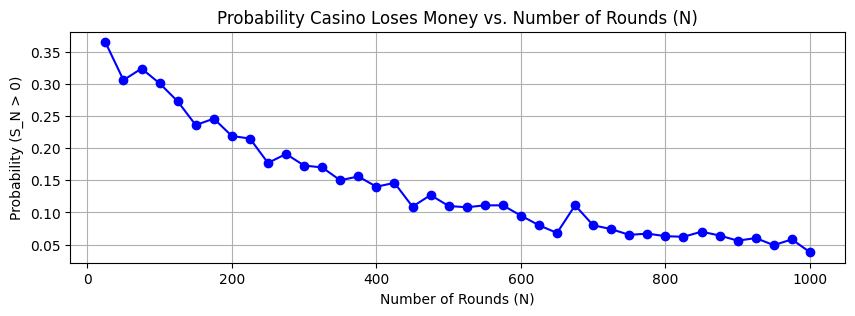

In [51]:
def monte_carlo_casino_loss(N_values, sim_num=1000):
    probabilities = []
    for N in N_values:
        positive_earnings = 0
        for _ in range(sim_num):
            total_earnings = simulate_game(N)
            if total_earnings > 0:
                positive_earnings += 1
        prob = positive_earnings / sim_num
        probabilities.append(prob)
    return probabilities

N_values = np.arange(25, 1001, 25)
probs = monte_carlo_casino_loss(N_values)


plt.figure(figsize=(10, 3))
plt.plot(N_values, probs, marker='o', linestyle='-', color='blue')
plt.title('Probability Casino Loses Money vs. Number of Rounds (N)')
plt.xlabel('Number of Rounds (N)')
plt.ylabel('Probability (S_N > 0)')
plt.grid(True)
plt.show()

The plot illustrates how the probability P(S_N > 0) decreases from approximately **0.40** at \( N = 25 \) to around **0.05** at \( N = 1000 \). Casinos promote continuous betting because As \( N \) increases, the likelihood of a player winning diminishes, making the casino's profits almost **guaranteed** in the long run.
